In [1]:
# Curvature only distance w/caching
# Rank evaluation using caching
from test_hybrid import (
    block_integral_curvatures_cpp,
    get_dist_mat_curvweighted,
    homog_aug,
    rank_eval
)

In [2]:
# load curvatures
import numpy as np
import cPickle as pickle
from os.path import join

with open("../dataset_loc", 'r') as f:
    dataset_loc = f.read().rstrip()

with open(join(dataset_loc, "Flukes/zooniverse_curvatures_winteg.pkl"), 'r') as f:
    curvatures = pickle.load(f)

In [3]:
sizes = [5,10,15,20]
for i in curvatures:
    i['block_curv'] = block_integral_curvatures_cpp(sizes, i['path'])

In [4]:
def curvweighted_dist(c1, c2, compare_on=None, weights=None, window=50):
    if weights is None:
        weights = {size:1. for size in c1['block_curv']}
    dist_mat = get_dist_mat_curvweighted(c1['block_curv'], c2['block_curv'], weights, window=window)
    return dist_mat[-1,-1]

In [5]:
bc_curvweighted_noalign_k50, results = rank_eval(curvatures, 
                                                   curvweighted_dist, None, k=50, verbose=False)

Took 1163.39 seconds


In [12]:
# test out flukebooks data
import utool as ut
with open(join(dataset_loc, "Flukes/Flukebook/fb_edges.pkl"), 'r') as f:
    fb_curvatures = pickle.load(f)

for i in ut.ProgressIter(fb_curvatures, lbl='Curvature'):
    i['block_curv'] = block_integral_curvatures_cpp(sizes, i['edge'])

Curvature    1/926...  rate=89.88 Hz, etr=0:00:10, ellapsed=0:00:00, wall=12:19 EST
Curvature    2/926...  rate=120.04 Hz, etr=0:00:07, ellapsed=0:00:00, wall=12:19 EST
Curvature    3/926...  rate=329.59 Hz, etr=0:00:02, ellapsed=0:00:00, wall=12:19 EST
Curvature    4/926...  rate=115.42 Hz, etr=0:00:07, ellapsed=0:00:00, wall=12:19 EST
Curvature    5/926...  rate=86.09 Hz, etr=0:00:10, ellapsed=0:00:00, wall=12:19 EST
Curvature    6/926...  rate=155.47 Hz, etr=0:00:05, ellapsed=0:00:00, wall=12:19 EST
Curvature    7/926...  rate=308.54 Hz, etr=0:00:02, ellapsed=0:00:00, wall=12:19 EST
Curvature    8/926...  rate=130.64 Hz, etr=0:00:07, ellapsed=0:00:00, wall=12:19 EST
Curvature    9/926...  rate=322.79 Hz, etr=0:00:02, ellapsed=0:00:00, wall=12:19 EST
Curvature   10/926...  rate=124.35 Hz, etr=0:00:07, ellapsed=0:00:00, wall=12:19 EST
Curvature   11/926...  rate=312.89 Hz, etr=0:00:02, ellapsed=0:00:00, wall=12:19 EST
Curvature   12/926...  rate=57.05 Hz, etr=0:00:16, ellapsed=0:00:00

In [13]:
fb_bc_curvweighted_noalign_k50, results = rank_eval(fb_curvatures, 
                                                   curvweighted_dist, None, k=50, verbose=True)

QueryImage    0/926...  Average distance for correct id: 177.71, giving k=14
Distance for k=0: 169.31
QueryImage    1/926...  rate=0.04 Hz, etr=7:02:05, ellapsed=0:00:27, wall=12:20 EST
QueryImage    2/926...  rate=3175.09 Hz, etr=0:00:00, ellapsed=0:00:27, wall=12:20 EST
Average distance for correct id: 138.95, giving k=-1
Distance for k=0: 64.95
QueryImage    3/926...  rate=0.12 Hz, etr=2:12:29, ellapsed=0:00:35, wall=12:20 EST
Average distance for correct id: 170.75, giving k=-1
Distance for k=0: 135.70
QueryImage    4/926...  rate=0.07 Hz, etr=3:28:13, ellapsed=0:00:49, wall=12:20 EST
Average distance for correct id: 105.96, giving k=-1
Distance for k=0: 35.11
QueryImage    5/926...  rate=0.16 Hz, etr=1:37:29, ellapsed=0:00:55, wall=12:20 EST
Average distance for correct id: 116.46, giving k=-1
Distance for k=0: 105.58
QueryImage    6/926...  rate=0.08 Hz, etr=3:09:00, ellapsed=0:01:08, wall=12:20 EST
Average distance for correct id: 119.02, giving k=-1
Distance for k=0: 98.83
Quer

In [10]:
print(fb_bc_curvweighted_noalign_k50)

[0.15228013029315962, 0.010586319218241042, 0.008957654723127036, 0.007328990228013029, 0.003257328990228013, 0.003257328990228013, 0.004885993485342019, 0.003257328990228013, 0.0008143322475570033, 0.003257328990228013, 0.004071661237785016, 0.0024429967426710096, 0.005700325732899023, 0.006514657980456026, 0.0016286644951140066, 0.0008143322475570033, 0.004071661237785016, 0.0, 0.0024429967426710096, 0.004071661237785016, 0.0016286644951140066, 0.0016286644951140066, 0.0016286644951140066, 0.0016286644951140066, 0.0016286644951140066, 0.0016286644951140066, 0.0016286644951140066, 0.003257328990228013, 0.0024429967426710096, 0.0016286644951140066, 0.0008143322475570033, 0.0008143322475570033, 0.0024429967426710096, 0.0016286644951140066, 0.0008143322475570033, 0.004071661237785016, 0.0008143322475570033, 0.0024429967426710096, 0.0016286644951140066, 0.0024429967426710096, 0.0016286644951140066, 0.0008143322475570033, 0.0008143322475570033, 0.004071661237785016, 0.0, 0.0, 0.00081433224

<Container object of 5 artists>

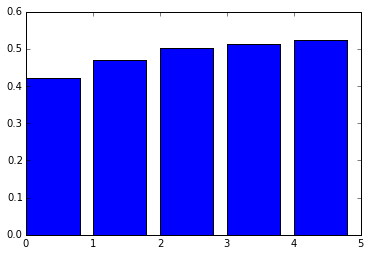

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(5), np.array(bc_curvweighted_noalign_k50).cumsum()[:5])

In [36]:
# reevaluate : min
correct_min = 0
correct_avg = 0
inters_correct = 0
inters = 0
disagreement_variance = [] # variance on the correct choice
agreement_variance = []
for query in results:
    matched_id_min = min(query['dists'].keys(), key=lambda x: min(query['dists'][x].values()))
    matched_id_avg = min(query['dists'].keys(), key=lambda x: np.average(query['dists'][x].values()))

    correct_min += int(matched_id_min == query['id'])
    correct_avg += int(matched_id_avg == query['id'])
    if matched_id_min == matched_id_avg:
        agreement_variance.append(np.std(query['dists'][matched_id_min].values()))
        inters += 1
        if (matched_id_min == query['id']):
            inters_correct += 1
    else:
        disagreement_variance.append(np.std(query['dists'][query['id']].values()))
print("Correct rankings by finding minimum %0.2f" % (correct_min / float(len(results))))
print("Correct rankings by finding average %0.2f" % (correct_avg / float(len(results))))
print("Percentage of rankings agreed on between average and minimum %0.2f" % (inters / float(len(results))))
print("Percentage of rankings agreed on that are correct %0.2f" % (inters_correct / float(inters)))
print("Average std in cases where minimum and avg agreed %0.2f(+/-%0.2f)" % (np.average(agreement_variance),
                                                                             np.std(agreement_variance)/2))
print("Average std of correct id in cases where minimum and avg disagreed %0.2f(+/-%0.2f)" % 
      (np.average(disagreement_variance),
       np.std(disagreement_variance)/2))

Correct rankings by finding minimum 0.53
Correct rankings by finding average 0.42
Percentage of rankings agreed on between average and minimum 0.48
Percentage of rankings agreed on that are correct 0.77
Average std in cases where minimum and avg agreed 3.93(+/-2.49)
Average std of correct id in cases where minimum and avg disagreed 5.17(+/-3.08)


In [37]:
curvatures[0].keys()

['int_curv', 'Q', 'diffhist', 'block_curv', 'path', 'id', 'fn']

In [119]:
imgs_dir = join(dataset_loc, "Flukes/CRC_combined constrained")
import cv2
from itertools import product

def visualize_curvature(curv, curv_weights, block_size, maxlen):
    wmax = max(curv_weights.values())
    curv_len = len(curv[curv.keys()[0]])
    image = np.zeros((block_size*len(curv), curv_len + (maxlen - curv_len)))
    for vind, size in enumerate(sorted(curv, key=lambda x: -curv_weights[x])):
        this_block_size = int((curv_weights[size] / wmax) * block_size)
        for hind, curv_elt in enumerate(curv[size]):
            image[vind*block_size:(vind*block_size + this_block_size), 
                  hind:(hind+1)] = curv_elt
    return image

def overlay_path(img, path):
    img_copy = img[:]
    # assume path is x, y
    for j, i in path:
        if (j >= img_copy.shape[1] or j < 0) or (i >= img_copy.shape[0] or i < 0):
                continue
        cv2.circle(img_copy, (j, i), 2, (255,0,0), thickness=-1)
        #img_copy[i,j] = [255,0,0]
    return img_copy

# visualizations
img_info_map = {i['fn']:{'path':i['path'],'block_curv':i['block_curv']} for i in curvatures}
def visualize_ranking_case(query, chooseby=min, maximgs=3, c=10):
    chosen_id = min(query['dists'].keys(), key=lambda x: chooseby(query['dists'][x].values()))
    chosen_imgs = sorted(query['dists'][chosen_id].items(), key=lambda x: x[1])[:maximgs]
    maxlen = len(img_info_map[query['fn']]['path'])
    correct_imgs = []
    if chosen_id != query['id']:
        correct_imgs = sorted(query['dists'][query['id']].items(), key=lambda x: x[1])[:maximgs]
    for img in chosen_imgs:
        maxlen = max(maxlen,len(img_info_map[img[0]]['path']))
    for img in correct_imgs:
        maxlen = max(maxlen,len(img_info_map[img[0]]['path']))

    # show the image with overlain path and block curvature (by the side) of the query
    fig1, ax1 = plt.subplots(1 + len(chosen_imgs) + len(correct_imgs), 2)
    fig1.set_size_inches(30,10)
    fig1.subplots_adjust(hspace=0.5, wspace=0.0)
    ax1[0,0].set_title("Query Image -- Correct ID: %s, Chosen ID: %s" % (query['id'], chosen_id))
    ax1[0,1].set_title("Query Curvature")
    ax1[0,0].imshow(overlay_path(cv2.imread(join(imgs_dir, query['fn'])), img_info_map[query['fn']]['path']))
    ax1[0,1].imshow(visualize_curvature(img_info_map[query['fn']]['block_curv'], 
                                         {s:1. for s in img_info_map[query['fn']]['block_curv']}, c, maxlen), 
                    cmap='Blues', vmin=0, vmax=1)
    for i, j in product(range(ax1.shape[0]),range(ax1.shape[1])):
        ax1[i,j].axis('off')
    for chosen_ind, chosen_img in enumerate(chosen_imgs):
        ax1[1+chosen_ind, 0].set_title("Chosen Image %d (dist=%0.2f)" % (chosen_ind, chosen_img[1]))
        ax1[1+chosen_ind, 1].set_title("Chosen Curvature %d" % chosen_ind)
        ax1[1+chosen_ind, 0].imshow(overlay_path(cv2.imread(join(imgs_dir, chosen_img[0])), 
                                                 img_info_map[chosen_img[0]]['path']))
        ax1[1+chosen_ind,1].imshow(visualize_curvature(img_info_map[chosen_img[0]]['block_curv'], 
                                         {s:1. for s in img_info_map[chosen_img[0]]['block_curv']}, c, maxlen), 
                    cmap='Blues', vmin=0, vmax=1)
    
    for correct_ind, correct_img in enumerate(correct_imgs):
        axind = 1+len(chosen_imgs) + correct_ind
        ax1[axind,0].set_title("Correct Image %d (dist=%0.2f)" % (correct_ind, correct_img[1]))
        ax1[axind,1].set_title("Correct Curvature %d" % correct_ind)
        ax1[axind,0].imshow(overlay_path(cv2.imread(join(imgs_dir, correct_img[0])), 
                                                 img_info_map[correct_img[0]]['path']))
        ax1[axind,1].imshow(visualize_curvature(img_info_map[correct_img[0]]['block_curv'], 
                                         {s:1. for s in img_info_map[correct_img[0]]['block_curv']}, c, maxlen), 
                    cmap='Blues', vmin=0, vmax=1)

In [11]:
import random
chooser = min
incorrect = filter(lambda x: min(x['dists'].keys(), key=lambda y: chooser(x['dists'][y].values())) != x['id'],
                   results)
incorrect_by_worst = sorted(incorrect, \
                            key=lambda x: min([chooser(i.values()) for i in x['dists'].values()]))
visualize_ranking_case(incorrect_by_worst[-1], chooseby=min, maximgs=2)

NameError: name 'visualize_ranking_case' is not defined

In [138]:
# to compare with Hotspotter, we're going to make a dict of image name -> was a correct match found
def correct_match_dict(result_list, chooser):
    match_dict = {}
    for result in result_list:
        match_dict[result['fn']] = (result['id'] == min(result['dists'].keys(), 
                                       key=lambda x: chooser(result['dists'][x].values())))
    return match_dict
result_min_dict = correct_match_dict(results, min)
result_avg_dict = correct_match_dict(results, np.average)

        

In [140]:
with open('./blockcurv_noalign_minchoice_rank.pkl', 'w') as f:
    pickle.dump(result_min_dict, f)
with open('./blockcurv_noalign_avgchoice_rank.pkl', 'w') as f:
    pickle.dump(result_avg_dict, f)

In [ ]:
print(results)

In [ ]:
print(results)